In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
df = pd.read_csv("data_balita.csv")

In [ ]:
label_encoder = LabelEncoder()
df['Status Gizi'] = label_encoder.fit_transform(df['Status Gizi'])

df = pd.get_dummies(df, columns=['Jenis Kelamin'], drop_first=True)

In [ ]:
X = df.drop(columns=['Status Gizi'])
y = df['Status Gizi']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

eval_results = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3943/3943 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6974 - loss: 0.7108 - val_accuracy: 0.9084 - val_loss: 0.2609
Epoch 2/50
3943/3943 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8577 - loss: 0.3475 - val_accuracy: 0.9280 - val_loss: 0.1979
Epoch 3/50
3943/3943 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8810 - loss: 0.2865 - val_accuracy: 0.9477 - val_loss: 0.1631
Epoch 4/50
3943/3943 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8932 - loss: 0.2548 - val_accuracy: 0.9356 - val_loss: 0.1691
Epoch 5/50
3943/3943 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9028 - loss: 0.2335 - val_accuracy: 0.9484 - val_loss: 0.1491
Epoch 6/50
3943/3943 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9076 - loss: 0.2202 - val_accuracy: 0.9129 - val_loss: 0.1879
Epoch 7/50
3943/3943 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9108 - loss: 0.2135 - val_accuracy: 0.9518 - val_loss: 0.1338
Epoch 8/50
3943/3943 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9149 - loss: 0.2035 - val_acc

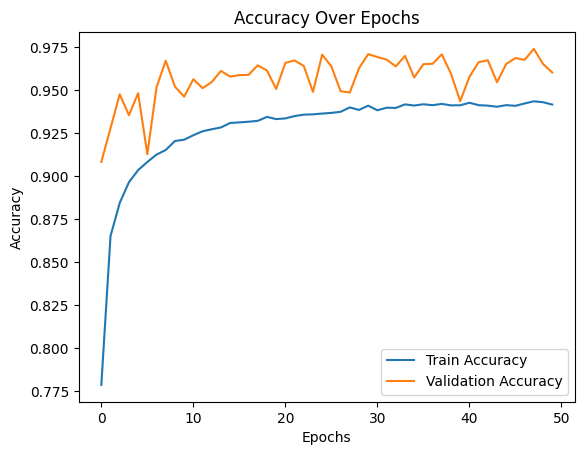

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

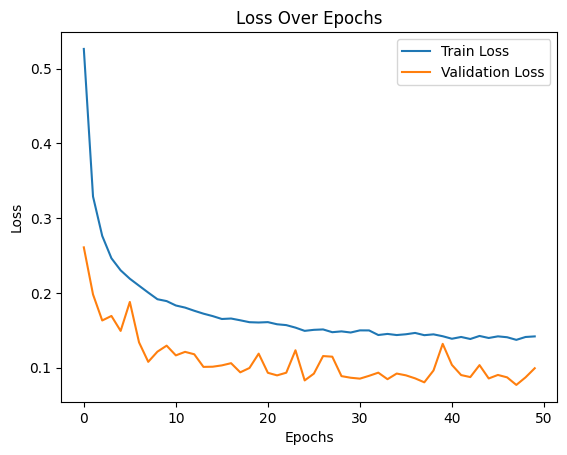

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.save('modelNN.h5')